c:\Users\Raman\anaconda3\envs\UTH\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
C:\Users\Raman\AppData\Local\Temp\ipykernel_5392\4012070738.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_trends_monthly = df_trends.resample('M').mean()


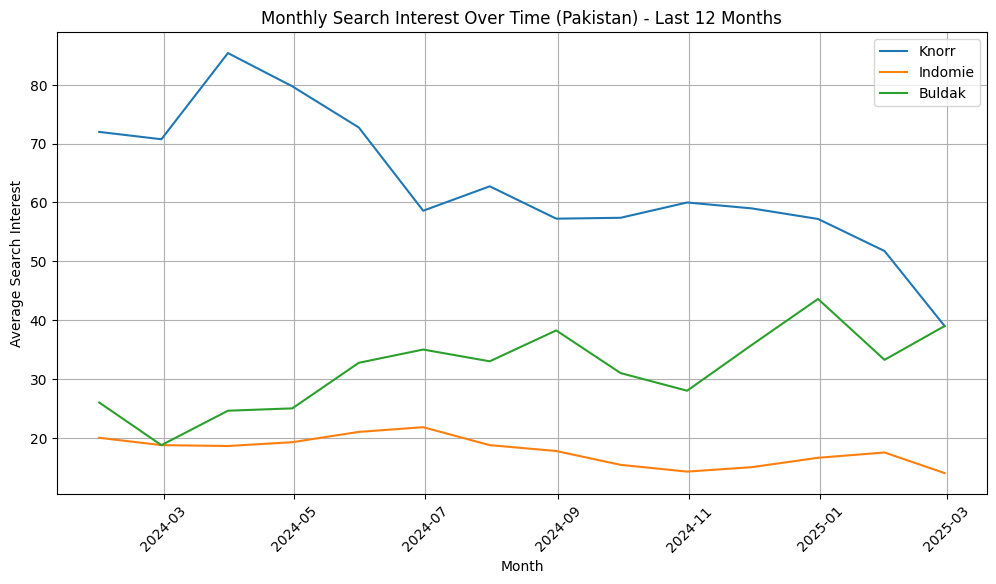

In [18]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Define keywords for comparison
keywords = ["Knorr", "Indomie", "Buldak"]

# Set up search parameters (last 12 months, Pakistan)
pytrends.build_payload(kw_list=keywords, timeframe='today 12-m', geo='PK', gprop='')

# Get interest over time
df_trends = pytrends.interest_over_time()

# Ensure data exists before processing
if df_trends.empty:
    print("No search trend data available for the selected keywords in Pakistan.")
else:
    # Resample to monthly frequency by taking the mean of each month
    df_trends_monthly = df_trends.resample('M').mean()

    # Plot the monthly search interest trends
    plt.figure(figsize=(12, 6))
    for keyword in keywords:
        plt.plot(df_trends_monthly.index, df_trends_monthly[keyword], label=keyword)

    plt.title("Monthly Search Interest Over Time (Pakistan) - Last 12 Months")
    plt.xlabel("Month")
    plt.ylabel("Average Search Interest")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()
df_trends_monthly.drop(columns=['isPartial']).to_csv('google_search_trends_monthly.csv')
